This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

2022-10-23 16:21:13.006547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2022-10-23 16:21:23.377548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6230 - accuracy: 0.8125 - val_loss: 0.2482 - val_accuracy: 0.9283
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2505 - accuracy: 0.9233 - val_loss: 0.1935 - val_accuracy: 0.9449
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1628 - accuracy: 0.9500 - val_loss: 0.2007 - val_accuracy: 0.9377
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1144 - accuracy: 0.9647 - val_loss: 0.1927 - val_accuracy: 0.9416
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0833 - accuracy: 0.9739 - val_loss: 0.1325 - val_accuracy: 0.9621
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0616 - accuracy: 0.9802 - val_loss: 0.2335 - val_accuracy: 0.9367
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0467 - accuracy: 0.9847 - val_loss: 0.1193 - val_accuracy: 0.9681
Epoch 

**Plotting a validation accuracy comparison**

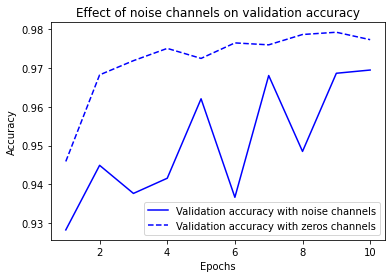

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 2.3178 - accuracy: 0.0998 - val_loss: 2.3064 - val_accuracy: 0.0992
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2994 - accuracy: 0.1181 - val_loss: 2.3124 - val_accuracy: 0.0970
Epoch 3/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2888 - accuracy: 0.1280 - val_loss: 2.3215 - val_accuracy: 0.1057
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2739 - accuracy: 0.1408 - val_loss: 2.3270 - val_accuracy: 0.1052
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2550 - accuracy: 0.1559 - val_loss: 2.3434 - val_accuracy: 0.1007
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2333 - accuracy: 0.1728 - val_loss: 2.3563 - val_accuracy: 0.1035
Epoch 7/100
375/375 [==============================] - 2s 7ms/step - loss: 2.2078 - accuracy: 0.1884 - val_loss: 2.3779 - val_accuracy: 0.1068

Epoch 58/100
375/375 [==============================] - 2s 5ms/step - loss: 0.9270 - accuracy: 0.6917 - val_loss: 4.6702 - val_accuracy: 0.1055
Epoch 59/100
375/375 [==============================] - 2s 5ms/step - loss: 0.9112 - accuracy: 0.6964 - val_loss: 4.7616 - val_accuracy: 0.1034
Epoch 60/100
375/375 [==============================] - 2s 4ms/step - loss: 0.8994 - accuracy: 0.7021 - val_loss: 4.7703 - val_accuracy: 0.1019
Epoch 61/100
375/375 [==============================] - 2s 4ms/step - loss: 0.8831 - accuracy: 0.7060 - val_loss: 4.8795 - val_accuracy: 0.1028
Epoch 62/100
375/375 [==============================] - 2s 4ms/step - loss: 0.8692 - accuracy: 0.7138 - val_loss: 4.9032 - val_accuracy: 0.1032
Epoch 63/100
375/375 [==============================] - 2s 4ms/step - loss: 0.8559 - accuracy: 0.7168 - val_loss: 4.9722 - val_accuracy: 0.1027
Epoch 64/100
375/375 [==============================] - 2s 4ms/step - loss: 0.8431 - accuracy: 0.7195 - val_loss: 5.0115 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 756.5256 - accuracy: 0.4125 - val_loss: 2.2390 - val_accuracy: 0.2765
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 5.2917 - accuracy: 0.2896 - val_loss: 2.4425 - val_accuracy: 0.3296
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 3.5802 - accuracy: 0.2381 - val_loss: 2.1383 - val_accuracy: 0.2233
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 3.2493 - accuracy: 0.2364 - val_loss: 3.3666 - val_accuracy: 0.3092
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 4.2141 - accuracy: 0.2659 - val_loss: 4.0479 - val_accuracy: 0.2952
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5228 - accuracy: 0.2397 - val_loss: 5.9107 - val_accuracy: 0.2441
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.8354 - accuracy: 0.2634 - val_loss: 2.0190 - val_accuracy: 0.2443
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3447 - accuracy: 0.9133 - val_loss: 0.1755 - val_accuracy: 0.9483
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1387 - accuracy: 0.9645 - val_loss: 0.1616 - val_accuracy: 0.9615
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1147 - accuracy: 0.9730 - val_loss: 0.1648 - val_accuracy: 0.9703
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1013 - accuracy: 0.9771 - val_loss: 0.1851 - val_accuracy: 0.9728
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0875 - accuracy: 0.9816 - val_loss: 0.2055 - val_accuracy: 0.9713
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0804 - accuracy: 0.9841 - val_loss: 0.2094 - val_accuracy: 0.9747
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0735 - accuracy: 0.9853 - val_loss: 0.2250 - val_accuracy: 0.9728
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6602 - accuracy: 0.8406 - val_loss: 0.3599 - val_accuracy: 0.9027
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3499 - accuracy: 0.9039 - val_loss: 0.3067 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.9125 - val_loss: 0.2906 - val_accuracy: 0.9176
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.9171 - val_loss: 0.2802 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2893 - accuracy: 0.9184 - val_loss: 0.2765 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9210 - val_loss: 0.2715 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9223 - val_loss: 0.2687 - val_accuracy: 0.9277
Epoch 

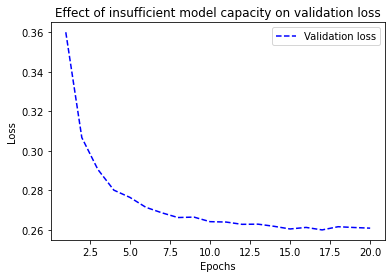

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3595 - accuracy: 0.8982 - val_loss: 0.1844 - val_accuracy: 0.9482
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9503 - val_loss: 0.1501 - val_accuracy: 0.9545
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9652 - val_loss: 0.1194 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0924 - accuracy: 0.9726 - val_loss: 0.1078 - val_accuracy: 0.9669
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9778 - val_loss: 0.1084 - val_accuracy: 0.9672
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0604 - accuracy: 0.9817 - val_loss: 0.0952 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0988 - val_accuracy: 0.9728
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 92ms/step - loss: 0.5298 - accuracy: 0.7765 - val_loss: 0.3955 - val_accuracy: 0.8698
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3172 - accuracy: 0.9024 - val_loss: 0.3152 - val_accuracy: 0.8847
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2288 - accuracy: 0.9299 - val_loss: 0.2828 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1810 - accuracy: 0.9415 - val_loss: 0.2765 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1484 - accuracy: 0.9538 - val_loss: 0.2902 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1188 - accuracy: 0.9637 - val_loss: 0.3007 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0975 - accuracy: 0.9695 - val_loss: 0.3303 - val_accuracy: 0.8798
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 89ms/step - loss: 0.6589 - accuracy: 0.6025 - val_loss: 0.6292 - val_accuracy: 0.6389
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6015 - accuracy: 0.7155 - val_loss: 0.5866 - val_accuracy: 0.7391
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5571 - accuracy: 0.7760 - val_loss: 0.5529 - val_accuracy: 0.7735
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5199 - accuracy: 0.8163 - val_loss: 0.5256 - val_accuracy: 0.8240
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4888 - accuracy: 0.8497 - val_loss: 0.5044 - val_accuracy: 0.8240
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4618 - accuracy: 0.8714 - val_loss: 0.4870 - val_accuracy: 0.8376
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4383 - accuracy: 0.8905 - val_loss: 0.4710 - val_accuracy: 0.8677
Epoch 8/20
30

**Version of the model with higher capacity**

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=1024, validation_split=0.4)

Epoch 1/20
15/15 [==============================] - 4s 240ms/step - loss: 0.6571 - accuracy: 0.6983 - val_loss: 0.4631 - val_accuracy: 0.7794
Epoch 2/20
15/15 [==============================] - 2s 140ms/step - loss: 0.4078 - accuracy: 0.8319 - val_loss: 0.2956 - val_accuracy: 0.8873
Epoch 3/20
15/15 [==============================] - 2s 142ms/step - loss: 0.2841 - accuracy: 0.8966 - val_loss: 0.2690 - val_accuracy: 0.8934
Epoch 4/20
15/15 [==============================] - 3s 173ms/step - loss: 0.1675 - accuracy: 0.9393 - val_loss: 0.2776 - val_accuracy: 0.8954
Epoch 5/20
15/15 [==============================] - 2s 155ms/step - loss: 0.1227 - accuracy: 0.9533 - val_loss: 0.3141 - val_accuracy: 0.8857
Epoch 6/20
15/15 [==============================] - 3s 186ms/step - loss: 0.1361 - accuracy: 0.9513 - val_loss: 0.2771 - val_accuracy: 0.8901
Epoch 7/20
15/15 [==============================] - 2s 158ms/step - loss: 0.0204 - accuracy: 0.9976 - val_loss: 0.3819 - val_accuracy: 0.8899
Epoch 

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6077 - accuracy: 0.7729 - val_loss: 0.4832 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4179 - accuracy: 0.8907 - val_loss: 0.3997 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3438 - accuracy: 0.9127 - val_loss: 0.3684 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3058 - accuracy: 0.9229 - val_loss: 0.3910 - val_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2828 - accuracy: 0.9315 - val_loss: 0.3813 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2691 - accuracy: 0.9375 - val_loss: 0.3601 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2568 - accuracy: 0.9404 - val_loss: 0.3671 - val_accuracy: 0.8834
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.6254 - accuracy: 0.6475 - val_loss: 0.5096 - val_accuracy: 0.8555
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4988 - accuracy: 0.7773 - val_loss: 0.3993 - val_accuracy: 0.8652
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4157 - accuracy: 0.8366 - val_loss: 0.3310 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3560 - accuracy: 0.8699 - val_loss: 0.3035 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3178 - accuracy: 0.8892 - val_loss: 0.2887 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2740 - accuracy: 0.9118 - val_loss: 0.2760 - val_accuracy: 0.8933
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2476 - accuracy: 0.9227 - val_loss: 0.2889 - val_accuracy: 0.8886
Epoch 8/20
30

## Summary